# Deep Learning With Python
### A linear Classifier in pure TensorFlow

In [19]:
import numpy as np

In [20]:
num_samples_per_class = 1000

# Generate the first class of points:
# 1000 random 2d points. Creates an oval-like point cloud oriented from bottom left to top right.

negative_samples = np.random.multivariate_normal(   
    mean=[0, 3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

# Generate the other class of points with a different mean and the same covariance matrix
# These are arrays with shape (1000, 2)

positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

### Stacking the two classes into an array with shape (2000, 2)

In [21]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

### Generating the corresponding target Labels (0 and 1)

In [22]:
# targets[i, 0] is 0 if inputs[i] belongs to class 0
# targets[i, 0] is 1 if inputs[i] belongs to class 1
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

### Plotting the two point classes with Matplotlib

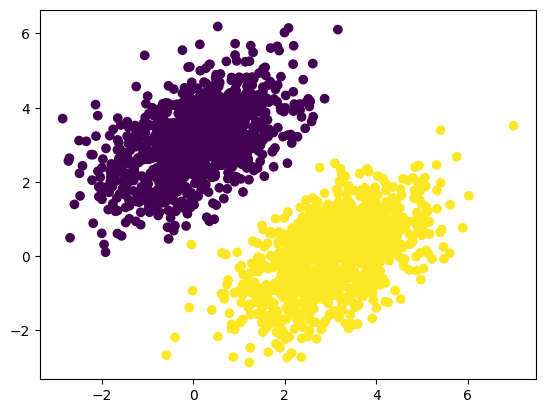

In [23]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs [:, 1], c=targets[:, 0])
plt.show()

### Creating the Linear Classifier Variables

In [24]:
import tensorflow as tf

# inputs are 2D points
input_dim = 2

# Output predictions are a single number. (close to 0 if predicted to be in class 0 and close to 1 if pred. to be in class 1)
output_dim = 1

W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

### Forward Pass Function

In [25]:
def model(inputs):
    return tf.matmul(inputs, W) + b

### Mean Squared Error Loss Function

In [26]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)         #reduce_mean averages these per-sample loss scores into a single scalar loss value

### The Training Step Function

In [29]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:                                     # \ 
        predictions = model(inputs)                                     # |    Forward pass, inside a gradient tape scope
        loss = square_loss(targets, predictions)                        # /
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])       # retrieve the gradient of the loss with regard to weights.
    W.assign_sub(grad_loss_wrt_W * learning_rate)                       # \
    b.assign_sub(grad_loss_wrt_b * learning_rate)                       # /    Update the weights
    return loss

### The Batch Training Loop

In [ ]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")